# Scope

Goal 1: Use a two-sample t-test, ANOVA and Tukey Range Test to determine if there is a significant change in my average running pace since March 20, 2022. The data will be imported from my Garmin account, which I use to track my runs. The results will help me determine if I've actually gotten slower or if it just feels like it.

Goal 2: Create a model to predict mile pace based on weather conditions and other run features.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas.plotting as pplt
import statsmodels.api as sm

from statistics import stdev
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# Import data
activities_all = pd.read_csv('Activities.csv')

## Data Inspection and Cleaning

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)

#View first 5 rows of data
activities_all.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg Run Cadence.1,Max Run Cadence.1,Training Stress Score®,Avg Power,Max Power,Grit,Flow,Avg. Swolf,Avg Stroke Rate,Total Reps,Dive Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2022-09-21 17:52:41,False,Lenexa Running,3.00,274,00:26:48,161,173,167,172,8:55,8:24,81,102,1.08,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:02.01.6,4,0.0,00:26:44,00:27:26,951,996
1,Running,2022-09-12 16:50:18,False,Lenexa Running,3.01,281,00:26:21,166,179,168,174,8:46,8:16,60,65,1.09,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:02.34.9,4,0.0,00:26:19,00:26:25,952,996
2,Running,2022-09-09 16:13:22,False,Lenexa Running,4.00,417,00:39:06,166,181,156,179,9:46,8:17,149,144,1.06,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:00.58.8,5,0.0,00:39:06,00:39:06,952,"1,027"
3,Running,2022-09-06 17:03:55,False,Lenexa Running,3.00,280,00:26:40,163,177,166,172,8:53,8:13,50,61,1.09,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,08:47.63.7,3,0.0,00:26:40,00:26:40,952,997
4,Running,2022-08-31 17:30:04,False,Lenexa Running,3.00,282,00:26:10,167,181,168,172,8:43,8:11,50,54,1.10,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:01.69.5,4,0.0,00:26:04,00:26:38,952,996


In [4]:
activities_all.columns

Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence',
       'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent',
       'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation',
       'Avg Ground Contact Time', 'Avg Run Cadence.1', 'Max Run Cadence.1',
       'Training Stress Score®', 'Avg Power', 'Max Power', 'Grit', 'Flow',
       'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps', 'Dive Time', 'Min Temp',
       'Surface Interval', 'Decompression', 'Best Lap Time', 'Number of Laps',
       'Max Temp', 'Moving Time', 'Elapsed Time', 'Min Elevation',
       'Max Elevation'],
      dtype='object')

In [5]:
# Drop unnecessary columns
activities_all = activities_all[['Activity Type', 'Date', 'Title', 'Distance', 'Calories', 'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace','Best Pace', 'Total Ascent', 'Total Descent', 'Avg Stride Length', 'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation']]

In [6]:
# Rename columns
activities_all.columns = ['activity_type', 'date', 'title', 'distance', 'calories', 'time', 'avg_hr', 'max_hr', 'avg_cadence', 'max_cadence', 'avg_pace', 'best_pace', 'total_ascent', 'total_descent', 'avg_stride', 'moving_time', 'elapsed_time', 'min_elevation', 'max_elevation']

In [7]:
activities_all.head()

,activity_type,date,title,distance,calories,time,avg_hr,max_hr,avg_cadence,max_cadence,avg_pace,best_pace,total_ascent,total_descent,avg_stride,moving_time,elapsed_time,min_elevation,max_elevation
0,Running,2022-09-21 17:52:41,Lenexa Running,3.00,274,00:26:48,161,173,167,172,8:55,8:24,81,102,1.08,00:26:44,00:27:26,951,996
1,Running,2022-09-12 16:50:18,Lenexa Running,3.01,281,00:26:21,166,179,168,174,8:46,8:16,60,65,1.09,00:26:19,00:26:25,952,996
2,Running,2022-09-09 16:13:22,Lenexa Running,4.00,417,00:39:06,166,181,156,179,9:46,8:17,149,144,1.06,00:39:06,00:39:06,952,"1,027"
3,Running,2022-09-06 17:03:55,Lenexa Running,3.00,280,00:26:40,163,177,166,172,8:53,8:13,50,61,1.09,00:26:40,00:26:40,952,997
4,Running,2022-08-31 17:30:04,Lenexa Running,3.00,282,00:26:10,167,181,168,172,8:43,8:11,50,54,1.10,00:26:04,00:26:38,952,996


In [8]:
# Add weather data from Garmin Connect (no function to export with run data)
activities_all['temp'] = [75, 82, 88, 82, 84, 72, 88, 82, 79, 81, 90, 90, 88, 84, 75, 93, 93, 88, 88, 91, 99, 95, 90, 82, 79, 82, 82, 64, 70, 79, 79, 88, 63, 73, 59, 79, 55, 66, 61, 55, 54, 73, 55, 43, 81, 63, 63, 50, 54, 64, 21, 52, 43, 52, 55, 63, 66, 54, 66, 64, 70, 46, 50, 66, 68, 72, 73, 66, 82, 73, 72, 79, 90, 77, 73, 73, 84, 82, 84, 88, 86, 84, 72, 93, 81, 82, 95, 90, 86, 84, 82, 77, 91, 86, 86, 73, 86, 79, 84, 93, 88, 72, 73, 72, 70, 63, 61, 63, 70, 54, 57, 61, 75, 61, 61, 48, 73, 70, 55, 70, 52, 68, 61, 57, 37, 50, 46, 48, 37, 45, 36, 64, 57, 37, 43, 54, 50, 39, 55, 63, 48, 72, 75, 66, 63, 46, 46, 79, 81, 63, 73, 66, 79, 79, 84, 93, 82, 84, 88, 84, 81, 73, 81, 93, 82, 81, 90, 91, 88, 84, 88, 90, 88, 68, 66, 48, 57, 63, 77, 64, 70, 54, 48, 77, 72, 68, 64, 48, 48, 66, 55, 57, 54, 43, 57, 41, 36, 43, 64, 30, 55, 45, 34, 25, 41, 36, 57, 64, 61, 39, 63, 55, 37, 55, 59, 57, 72, 64, 72, 68, 61, 84, 79, 75, 77, 82, 82, 66, 81, 82, 66, 81, 84, 72, 86, 84, 72, 79, 82, 88, 64, 84, 79, 81, 77, 82, 73, 88, 82, 90, 73, 70, 90, 90, 81, 91, 84, 79, 73, 79, 75, 81, 77, 79, 88, 84, 68, 82, 48, 63, 61, 63, 77, 73, 75, 64, 55, 54, 57, 52, 54, 43, 36, 43, 28, 37, 30, 32, 28, 37, 50, 50, 45, 28, 59, 45, 34, 45, 55, 70, 55, 61, 70, 61, 64, 61, 45, 48, 'NaN', 82, 88, 77, 72, 86, 79, 79, 81, 90, 75, 81, 82, 88, 77, 95, 75, 79, 88, 91, 88, 84, 81, 95, 99, 93, 93, 84, 93, 84, 72, 81, 84, 86, 90, 88, 81, 88, 91, 84, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 84, 73, 81, 81, 84, 84, 61, 81, 81, 73, 75, 63, 66, 50, 61, 46, 43, 55, 45, 61, 54, 64, 52, 61, 54, 59, 61, 50, 46, 36, 48, 30, 39, 41, 45, 45, 70, 57, 66, 52, 50, 45, 52, 48, 48, 64, 68, 63, 77, 'NaN', 'NaN', 73, 75, 64, 72, 86, 79, 82, 79, 81, 81, 79, 77, 84, 84, 79, 77, 75, 86, 73, 77, 84, 88, 'NaN', 90, 86, 95, 91, 'NaN', 81, 81, 81, 90, 79, 90, 81, 86, 88, 81, 82, 82, 84, 75, 66, 82, 72, 72, 82, 64, 57, 54, 77, 72, 63, 64, 54, 'NaN', 'NaN', 'NaN', 'NaN', 59, 55, 63, 72, 50, 70, 43, 48, 45, 55, 39, 48, 46, 36, 27, 25, 43, 48, 52, 66, 55, 68, 73, 72, 75, 75, 68, 'NaN', 'NaN', 'NaN', 'NaN']
activities_all['humidity'] = [69, 30, 36, 55, 40, 78, 43, 48, 65, 51, 46, 34, 43, 62, 74, 36, 28, 63, 43, 34, 40, 44, 59, 58, 48, 58, 58, 88, 60, 39, 61, 55, 68, 36, 39, 54, 28, 37, 36, 33, 32, 33, 62, 39, 16, 20, 59, 25, 26, 18, 32, 30, 49, 50, 38, 68, 56, 22, 68, 56, 46, 46, 76, 46, 43, 38, 41, 49, 48, 61, 65, 70, 30, 41, 29, 36, 52, 27, 55, 59, 59, 55, 55, 50, 37, 42, 47, 41, 40, 45, 66, 61, 53, 46, 38, 94, 55, 28, 55, 28, 55, 61, 73, 83, 49, 27, 45, 27, 60, 47, 36, 31, 47, 59, 55, 87, 41, 26, 33, 18, 28, 23, 29, 41, 65, 58, 46, 46, 56, 66, 51, 28, 24, 41, 75, 41, 32, 35, 35, 29, 32, 57, 31, 32, 42, 66, 53, 51, 37, 36, 27, 40, 48, 48, 62, 41, 42, 40, 55, 66, 79, 44, 74, 47, 62, 70, 43, 49, 55, 37, 43, 41, 63, 68, 83, 50, 36, 48, 47, 42, 46, 32, 27, 57, 38, 28, 83, 87, 71, 46, 16, 36, 41, 42, 67, 45, 55, 70, 37, 64, 33, 53, 69, 80, 48, 55, 41, 64, 39, 41, 52, 38, 93, 58, 31, 44, 38, 37, 43, 40, 72, 66, 54, 74, 47, 45, 37, 88, 62, 70, 100, 70, 43, 94, 59, 62, 83, 74, 55, 36, 88, 45, 45, 45, 83, 58, 89, 46, 55, 52, 89, 94, 52, 52, 79, 53, 52, 45, 78, 70, 65, 62, 65, 23, 36, 55, 68, 55, 93, 83, 72, 72, 54, 41, 39, 68, 38, 67, 41, 35, 44, 81, 69, 56, 74, 52, 69, 80, 100, 44, 34, 46, 66, 74, 41, 57, 47, 57, 51, 40, 67, 39, 46, 77, 45, 39, 57, 87, 'NaN', 66, 52, 79, 83, 49, 54, 54, 74, 59, 69, 39, 48, 52, 69, 39, 54, 65, 33, 28, 46, 62, 84, 39, 33, 44, 50, 55, 56, 48, 73, 70, 52, 59, 49, 43, 42, 46, 41, 52, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 52, 61, 62, 70, 43, 29, 72, 62, 32, 25, 22, 25, 40, 40, 39, 66, 36, 38, 76, 55, 47, 18, 32, 31, 19, 23, 22, 34, 13, 35, 32, 43, 87, 56, 39, 24, 60, 36, 49, 50, 76, 57, 71, 37, 27, 42, 40, 55, 39, 'NaN', 'NaN', 78, 41, 83, 41, 59, 51, 48, 51, 51, 42, 61, 94, 66, 62, 65, 65, 44, 46, 78, 57, 55, 55, 'NaN', 52, 62, 53, 53, 'NaN', 66, 70, 66, 52, 37, 41, 54, 66, 52, 32, 35, 45, 52, 44, 46, 51, 38, 73, 42, 42, 55, 54, 57, 53, 42, 30, 82, 'NaN', 'NaN', 'NaN', 'NaN', 77, 30, 36, 31, 29, 28, 61, 43, 33, 58, 81, 66, 53, 51, 42, 58, 81, 50, 50, 46, 47, 46, 65, 61, 65, 47, 73, 'NaN', 'NaN', 'NaN', 'NaN']
activities_all['wind'] = [21, 12, 7, 7, 5, 18, 5, 5, 12, 6, 12, 9, 5, 0, 8, 5, 6, 15, 7, 13, 15, 9, 18, 7, 15, 9, 20, 8, 16, 6, 10, 21, 6, 17, 13, 23, 18, 9, 13, 16, 20, 16, 8, 7, 12, 6, 7, 5, 17, 16, 12, 9, 9, 14, 14, 14, 20, 15, 10, 7, 3, 3, 0, 5, 12, 12, 7, 9, 10, 8, 8, 7, 9, 9, 9, 10, 10, 9, 9, 7, 9, 8, 0, 16, 7, 8, 5, 8, 5, 7, 7, 6, 14, 9, 6, 8, 15, 15, 6, 8, 6, 3, 12, 14, 10, 10, 5, 14, 13, 13, 13, 12, 23, 15, 13, 14, 22, 18, 5, 10, 10, 18, 17, 17, 5, 13, 10, 10, 7, 9, 3, 20, 14, 5, 12, 8, 14, 12, 12, 7, 10, 12, 15, 13, 7, 9, 7, 14, 6, 'NaN', 21, 12, 10, 9, 12, 13, 6, 17, 9, 6, 9, 6, 10, 12, 0, 14, 13, 12, 12, 7, 14, 12, 16, 9, 8, 6, 14, 12, 9, 12, 12, 7, 27, 14, 17, 12, 0, 7, 8, 6, 3, 6, 6, 8, 9, 8, 13, 15, 8, 15, 13, 8, 8, 7, 13, 5, 12, 22, 7, 12, 7, 'NaN', 10, 6, 17, 24, 16, 17, 13, 0, 7, 15, 8, 16, 7, 3, 7, 9, 12, 7, 16, 15, 10, 5, 9, 7, 7, 5, 13, 14, 5, 10, 7, 18, 12, 12, 0, 0, 14, 10, 0, 6, 8, 10, 8, 12, 10, 12, 13, 14, 12, 8, 15, 9, 10, 16, 9, 12, 0, 3, 15, 0, 16, 18, 14, 6, 12, 7, 18, 12, 6, 9, 6, 10, 13, 15, 13, 15, 13, 12, 17, 5, 12, 13, 16, 12, 5, 10, 8, 14, 8, 7, 7, 10, 8, 6, 6, 0, 'NaN', 14, 25, 15, 13, 5, 12, 6, 13, 17, 10, 6, 14, 12, 5, 12, 9, 9, 7, 5, 10, 9, 7, 8, 5, 9, 14, 8, 12, 14, 10, 6, 9, 0, 10, 6, 10, 13, 9, 12, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 10, 3, 10, 7, 10, 6, 0, 16, 28, 14, 13, 13, 10, 3, 16, 12, 12, 6, 12, 17, 'NaN', 21, 8, 3, 24, 20, 10, 7, 13, 13, 23, 3, 13, 7, 14, 12, 16, 12, 16, 8, 8, 12, 17, 20, 10, 5, 12, 0, 7, 'NaN', 'NaN', 10, 10, 3, 10, 13, 0, 9, 10, 13, 6, 13, 5, 8, 0, 7, 8, 3, 5, 5, 8, 9, 9, 'NaN', 8, 3, 15, 20, 'NaN', 17, 7, 10, 17, 15, 13, 9, 13, 17, 5, 8, 13, 14, 18, 13, 21, 6, 10, 16, 6, 22, 15, 16, 9, 7, 12, 12, 'NaN', 'NaN', 'NaN', 'NaN', 18, 24, 17, 5, 6, 18, 15, 5, 16, 20, 5, 12, 18, 5, 12, 5, 9, 9, 9, 9, 13, 13, 16, 18, 14, 8, 14, 'NaN', 'NaN', 'NaN', 'NaN']

In [9]:
activities_all.title.unique()

array(['Lenexa Running', 'Shawnee Running', 'Running',
       'Shawnee - Pre-Race Workout', 'Shawnee - Run Walk Run®',
       'Shawnee - Speed Repeats', 'Shawnee - Drill Workout',
       'Shawnee - Hill Repeats', 'Shawnee - Benchmark Run',
       'Shawnee - Progression Run', 'Shawnee - Goal Pace Run',
       'Shawnee - Easy Run', 'Shawnee - Stride Repeats',
       'Shawnee - Long Easy Run', 'Kansas City Running',
       'Shawnee - Running', 'Shawnee run', 'Imogene Running',
       'Shawnee Mission Running', 'Manson Running', 'Untitled'],
      dtype=object)

In [10]:
# Add year and month columns
activities_all['year'] = activities_all.date.apply(lambda x: x[:4])
activities_all['month'] = activities_all.date.apply(lambda x: x[5:7])

In [11]:
# Remove data from 2015 and 2016 due to not enough data
activities_all = activities_all[(activities_all.year != '2015') & (activities_all.year != '2016')]

In [12]:
# Remove all non-standard run types to normalize running speed
activities_reg = activities_all[activities_all.title.isin(['Lenexa Running', 'Shawnee Running', 'Running', 'Kansas City Running', 'Shawnee - Running', 'Shawnee run', 'Shawnee Mission Running', 'Manson Running', 'Untitled'])]

In [13]:
activities_reg.distance.unique()

array([ 3.  ,  3.01,  4.  ,  5.  ,  4.02,  6.  ,  4.01,  3.7 ,  5.02,
        5.01,  3.03,  3.02,  3.09,  2.32,  5.08,  3.2 ,  6.01,  4.28,
        5.1 ,  7.01,  3.67,  8.01,  4.03,  7.  ,  5.06,  3.19,  3.66,
        5.22,  4.3 , 10.01,  6.68,  4.34,  9.  ,  9.01,  3.12,  4.46,
        3.47,  3.65,  3.51,  4.5 ,  4.57,  3.81])

In [14]:
# Remove all rows where the distance is under 2 miles -- I don't usually run less than that, so it's most likely a glitch
activities_reg = activities_reg[activities_reg.distance >= 2]

In [15]:
activities_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 475
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   activity_type  422 non-null    object 
 1   date           422 non-null    object 
 2   title          422 non-null    object 
 3   distance       422 non-null    float64
 4   calories       422 non-null    object 
 5   time           422 non-null    object 
 6   avg_hr         422 non-null    object 
 7   max_hr         422 non-null    object 
 8   avg_cadence    422 non-null    int64  
 9   max_cadence    422 non-null    int64  
 10  avg_pace       422 non-null    object 
 11  best_pace      422 non-null    object 
 12  total_ascent   422 non-null    object 
 13  total_descent  422 non-null    object 
 14  avg_stride     422 non-null    float64
 15  moving_time    422 non-null    object 
 16  elapsed_time   422 non-null    object 
 17  min_elevation  422 non-null    object 
 18  max_elevat

In [16]:
activities_reg.describe(include = 'all')

,activity_type,date,title,distance,calories,time,avg_hr,max_hr,avg_cadence,max_cadence,avg_pace,best_pace,total_ascent,total_descent,avg_stride,moving_time,elapsed_time,min_elevation,max_elevation,temp,humidity,wind,year,month
count,422,422,422,422.000000,422,422,422,422,422.000000,422.000000,422,422,422,422,422.000000,422,422,422,422,422.0,422.0,422.0,422,422
unique,1,419,7,NaN,234,359,32,25,NaN,NaN,108,132,105,104,NaN,318,383,32,46,41.0,74.0,24.0,6,12
top,Running,2018-05-25 17:05:59,Shawnee Running,NaN,295,00:54:20,164,186,NaN,NaN,8:40,7:39,96,125,NaN,00:00:00,00:00:00,780,905,84.0,55.0,12.0,2018,05
freq,422,4,337,NaN,8,4,44,46,NaN,NaN,14,11,19,24,NaN,59,5,152,115,25.0,20.0,44.0,94,48
mean,NaN,NaN,NaN,4.180284,NaN,NaN,NaN,NaN,164.535545,183.928910,NaN,NaN,NaN,NaN,1.054289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.162115,NaN,NaN,NaN,NaN,18.648834,24.096592,NaN,NaN,NaN,NaN,0.158697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2.320000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.010000,NaN,NaN,NaN,NaN,164.000000,179.000000,NaN,NaN,NaN,NaN,1.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,168.000000,183.000000,NaN,NaN,NaN,NaN,1.075000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,5.010000,NaN,NaN,NaN,NaN,170.000000,186.000000,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Remove entries with blank data and remove commas from numerical values
activities_reg = activities_reg[(activities_reg.total_ascent != '--') & (activities_reg.temp != 'NaN') & (activities_reg.humidity != 'NaN') & (activities_reg.wind != 'NaN') & (activities_reg.moving_time != '00:00:00') ]
activities_reg.max_elevation = activities_reg.max_elevation.apply(lambda x: x.replace(',', ''))
activities_reg = activities_reg.reset_index(drop = True)

In [18]:
# Update data types
activities_reg.distance = activities_reg.distance.astype('float')

# Columns to change to int
int_list = ['calories', 'avg_hr', 'max_hr', 'avg_cadence', 'max_cadence', 'total_ascent', 'total_descent', 'min_elevation', 'max_elevation', 'temp', 'humidity', 'wind']

for column in int_list:
    activities_reg[column] = activities_reg[column].astype('int')

In [19]:
# Remove data with no heart rate data
activities_reg = activities_reg[(activities_reg.avg_hr != 0.000000) & (activities_reg.max_hr != 0.000000)]

In [20]:
# Add elevation difference column
activities_reg['elev_diff'] = activities_reg.max_elevation - activities_reg.min_elevation

In [21]:
# Get just date from 'date' column
activities_reg.date = pd.to_datetime(activities_reg.date)
activities_reg.date = activities_reg.date.apply(lambda x: x.strftime('%Y-%m-%d'))

# Convert avg_pace to int type
activities_reg['pace_str'] = activities_reg.avg_pace.astype(str)
activities_reg['pace_min'] = activities_reg.pace_str.apply(lambda x: x[0:1] if len(x) == 4 else x[0:2]).astype('int')
activities_reg['pace_sec'] = activities_reg.pace_str.apply(lambda x: x[-2:]).astype('int')
activities_reg['avg_pace_int'] = activities_reg.pace_min + (activities_reg.pace_sec / 60)

activities_reg.head()

,activity_type,date,title,distance,calories,time,avg_hr,max_hr,avg_cadence,max_cadence,avg_pace,best_pace,total_ascent,total_descent,avg_stride,moving_time,elapsed_time,min_elevation,max_elevation,temp,humidity,wind,year,month,elev_diff,pace_str,pace_min,pace_sec,avg_pace_int
0,Running,2022-09-21,Lenexa Running,3.00,274,00:26:48,161,173,167,172,8:55,8:24,81,102,1.08,00:26:44,00:27:26,951,996,75,69,21,2022,09,45,8:55,8,55,8.916667
1,Running,2022-09-12,Lenexa Running,3.01,281,00:26:21,166,179,168,174,8:46,8:16,60,65,1.09,00:26:19,00:26:25,952,996,82,30,12,2022,09,44,8:46,8,46,8.766667
2,Running,2022-09-09,Lenexa Running,4.00,417,00:39:06,166,181,156,179,9:46,8:17,149,144,1.06,00:39:06,00:39:06,952,1027,88,36,7,2022,09,75,9:46,9,46,9.766667
3,Running,2022-09-06,Lenexa Running,3.00,280,00:26:40,163,177,166,172,8:53,8:13,50,61,1.09,00:26:40,00:26:40,952,997,82,55,7,2022,09,45,8:53,8,53,8.883333
4,Running,2022-08-31,Lenexa Running,3.00,282,00:26:10,167,181,168,172,8:43,8:11,50,54,1.10,00:26:04,00:26:38,952,996,84,40,5,2022,08,44,8:43,8,43,8.716667


In [22]:
activities_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 357
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   activity_type  356 non-null    object 
 1   date           356 non-null    object 
 2   title          356 non-null    object 
 3   distance       356 non-null    float64
 4   calories       356 non-null    int64  
 5   time           356 non-null    object 
 6   avg_hr         356 non-null    int64  
 7   max_hr         356 non-null    int64  
 8   avg_cadence    356 non-null    int64  
 9   max_cadence    356 non-null    int64  
 10  avg_pace       356 non-null    object 
 11  best_pace      356 non-null    object 
 12  total_ascent   356 non-null    int64  
 13  total_descent  356 non-null    int64  
 14  avg_stride     356 non-null    float64
 15  moving_time    356 non-null    object 
 16  elapsed_time   356 non-null    object 
 17  min_elevation  356 non-null    int64  
 18  max_elevat

## EDA

In [23]:
activities_reg.describe(include = 'all', datetime_is_numeric = True)

,activity_type,date,title,distance,calories,time,avg_hr,max_hr,avg_cadence,max_cadence,avg_pace,best_pace,total_ascent,total_descent,avg_stride,moving_time,elapsed_time,min_elevation,max_elevation,temp,humidity,wind,year,month,elev_diff,pace_str,pace_min,pace_sec,avg_pace_int
count,356,356,356,356.000000,356.000000,356,356.000000,356.000000,356.000000,356.000000,356,356,356.000000,356.000000,356.000000,356,356,356.000000,356.000000,356.000000,356.000000,356.000000,356,356,356.000000,356,356.000000,356.000000,356.000000
unique,1,356,5,NaN,NaN,311,NaN,NaN,NaN,NaN,103,117,NaN,NaN,NaN,310,331,NaN,NaN,NaN,NaN,NaN,6,12,NaN,103,NaN,NaN,NaN
top,Running,2022-09-21,Shawnee Running,NaN,NaN,00:36:22,NaN,NaN,NaN,NaN,8:46,7:39,NaN,NaN,NaN,00:26:17,00:39:12,NaN,NaN,NaN,NaN,NaN,2018,08,NaN,8:46,NaN,NaN,NaN
freq,356,1,291,NaN,NaN,3,NaN,NaN,NaN,NaN,13,10,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,85,43,NaN,13,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.175112,410.005618,NaN,163.098315,183.808989,166.766854,186.474719,NaN,NaN,109.567416,129.977528,1.075197,NaN,NaN,801.966292,922.955056,68.396067,49.682584,10.351124,NaN,NaN,120.988764,NaN,8.457865,31.831461,8.988390
std,NaN,NaN,NaN,1.184870,124.443527,NaN,4.982097,4.161193,4.886788,13.189921,NaN,NaN,42.470184,39.797226,0.028802,NaN,NaN,66.092884,38.311006,16.643161,16.540955,4.971216,NaN,NaN,30.653537,NaN,0.557580,17.624558,0.423649
min,NaN,NaN,NaN,2.320000,219.000000,NaN,133.000000,165.000000,147.000000,172.000000,NaN,NaN,42.000000,47.000000,0.980000,NaN,NaN,738.000000,853.000000,21.000000,13.000000,0.000000,NaN,NaN,43.000000,NaN,7.000000,0.000000,7.983333
25%,NaN,NaN,NaN,3.010000,300.000000,NaN,161.000000,181.000000,164.750000,180.000000,NaN,NaN,94.000000,120.000000,1.050000,NaN,NaN,764.000000,905.000000,55.000000,38.000000,7.000000,NaN,NaN,124.000000,NaN,8.000000,16.000000,8.683333
50%,NaN,NaN,NaN,4.000000,387.500000,NaN,164.000000,184.000000,168.000000,183.000000,NaN,NaN,106.000000,126.000000,1.070000,NaN,NaN,780.000000,906.000000,72.000000,48.000000,10.000000,NaN,NaN,127.000000,NaN,8.000000,34.000000,8.916667
75%,NaN,NaN,NaN,5.010000,484.250000,NaN,166.000000,186.000000,170.000000,187.000000,NaN,NaN,120.000000,140.250000,1.090000,NaN,NaN,780.000000,909.000000,82.000000,61.000000,13.000000,NaN,NaN,141.000000,NaN,9.000000,47.000000,9.200000


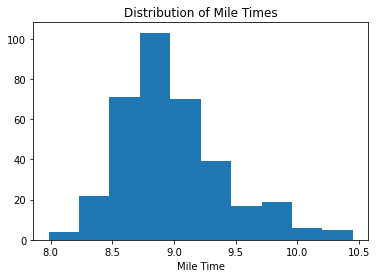

<Figure size 432x288 with 0 Axes>

In [24]:
# Check distribution of average pace values
plt.hist(activities_reg.avg_pace_int)
plt.title('Distribution of Mile Times')
plt.xlabel('Mile Time')
plt.show()
plt.clf()

# Slightly right-skewed

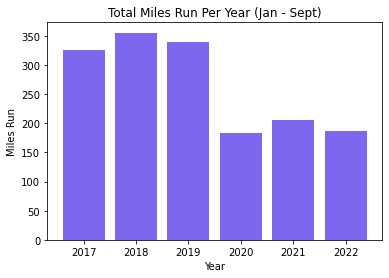

<Figure size 432x288 with 0 Axes>

In [25]:
# Compare total miles run by year (up to September)
years = activities_all.year.unique()
years.sort()
miles = [sum(activities_all.distance[(activities_all.year == i) & (activities_all.month <= '09')]) for i in years]

plt.bar(years, miles, color = 'mediumslateblue')
plt.title('Total Miles Run Per Year (Jan - Sept)')
plt.xlabel('Year')
plt.ylabel('Miles Run')
plt.show()
plt.clf()

The total miles run in 2022 up to September is not noticeably different than in 2021 and 2020.

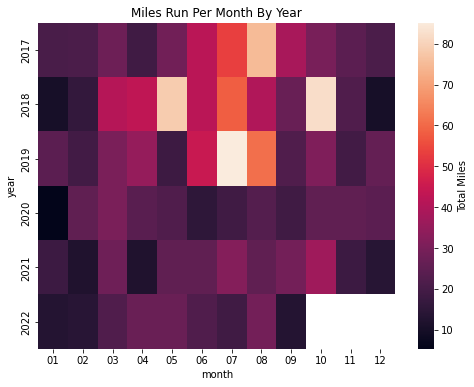

<Figure size 432x288 with 0 Axes>

In [26]:
# Heatmap of miles per month
totals = activities_all.groupby(['year', 'month']).sum()
totals_mnth_yr = totals.reset_index().pivot(index = 'year', columns = 'month', values = 'distance')

plt.figure(figsize = (8, 6))

sns.heatmap(totals_mnth_yr, cbar_kws = {'label': 'Total Miles'})
plt.title('Miles Run Per Month By Year')
plt.show()
plt.clf()

The total number of miles run per month is fairly consistent, with the exception of the summers of 2017-2019, which had higher monthly totals.

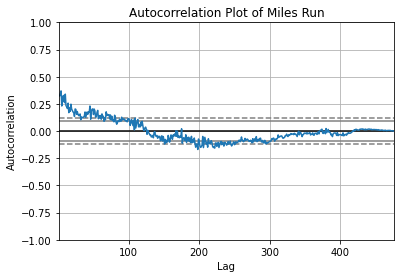

<Figure size 432x288 with 0 Axes>

In [27]:
pplt.autocorrelation_plot(activities_all.distance)
plt.title('Autocorrelation Plot of Miles Run')
plt.show()
plt.clf()

There does not appear to be seasonality, and the observations appear to be independent of each other.

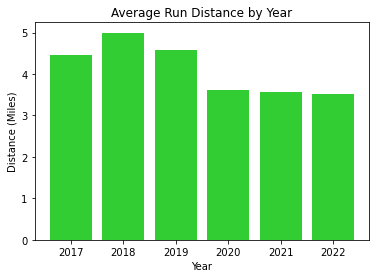

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot average run distance by year
years = activities_all.year.unique()
years.sort()
avg_dist = [(activities_all.distance[activities_all.year == i]).mean() for i in years]

plt.bar(years, avg_dist, color = 'limegreen')
plt.title('Average Run Distance by Year')
plt.xlabel('Year')
plt.ylabel('Distance (Miles)')
plt.show()
plt.clf()

My average distance per run has been consistent over the past 3 years, with higher averages in previous years.

# Analysis

## Goal 1: test for significant difference in average mile pace before and after March 20, 2022

Null Hypothesis: There is not a significant difference in my average mile pace before and after March 20, 2022. 

Alternative Hypothesis: There is a significant difference in my average mile pace before and after March 20, 2022.

Significance threshold: 0.05

Method: I will use data for runs between 3 and 4 miles in length to limit pace variation due to distance.
Divide data into different sets:

 1. Data after March 20, 2022
 2. All data before March 20, 2022
 3. Data from previous years for the same months as set 1 (March - September) (seasonal comparison)

In [29]:
# Get data for runs between 3 and 4 miles in length
activities_3_4 = activities_reg[(activities_reg.distance >= 3) & (activities_reg.distance <= 4)]

In [30]:
# Get data for runs after March 20, 2022 (set 1)
activities_after = activities_3_4[activities_3_4.date >= '2022-03-20']

In [31]:
# Get data for runs before March 20, 2022 (set 2)
activities_before = activities_3_4[activities_3_4.date < '2022-03-20']

In [32]:
# Get data for March - September for previous years (set 3)
summer_2017 = activities_before[(activities_before.date >= '2017-03-20') & (activities_before.date <= '2017-09-21')]
summer_2018 = activities_before[(activities_before.date >= '2018-03-20') & (activities_before.date <= '2018-09-21')]
summer_2019 = activities_before[(activities_before.date >= '2019-03-20') & (activities_before.date <= '2019-09-21')]
summer_2020 = activities_before[(activities_before.date >= '2020-03-20') & (activities_before.date <= '2020-09-21')]
summer_2021 = activities_before[(activities_before.date >= '2021-03-20') & (activities_before.date <= '2021-09-21')]

In [33]:
# Check equal variance assumption
before_st_dev = stdev(activities_before.avg_pace_int)
after_st_dev = stdev(activities_after.avg_pace_int)
ratio = before_st_dev / after_st_dev
ratio

1.5615890329778401

The variances are not equal, so the parameter "equal_var = False" is needed.

In [34]:
# Run two-sample t-test to look for significant difference between data before and after March 20, 2022
tstat, pval = ttest_ind(activities_before.avg_pace_int, activities_after.avg_pace_int, equal_var = False)
pval

0.9836838069182449

The p-value is > 0.05, so the null hypothesis cannot be rejected. My average mile pace from before and after March 20, 2022 is not significantly different for 3-4 mile runs.

In [35]:
# Run ANOVA on all data sets for the same time period of different years
fstat, pval = f_oneway(activities_after.avg_pace_int, summer_2017.avg_pace_int, summer_2018.avg_pace_int, summer_2019.avg_pace_int,
                       summer_2020.avg_pace_int, summer_2021.avg_pace_int)
pval

0.0008007860446498849

The p-value is < 0.05, so at least one pair has a significantly different average.

In [36]:
# Concatenate all summer datasets for Tukey test
summer = pd.concat([summer_2017, summer_2018, summer_2019, summer_2020, summer_2021, activities_after])

tukey_results = pairwise_tukeyhsd(summer.avg_pace_int, summer.year, 0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2017   2018   0.0326    1.0 -0.8454  0.9107  False
  2017   2019  -0.1833  0.996 -1.2423  0.8756  False
  2017   2020   0.3607 0.7673 -0.4259  1.1473  False
  2017   2021   0.5598 0.3044 -0.2204  1.3401  False
  2017   2022   0.1703 0.9882 -0.6099  0.9506  False
  2018   2019   -0.216 0.9799  -1.094  0.6621  False
  2018   2020   0.3281  0.446 -0.1899   0.846  False
  2018   2021   0.5272 0.0373  0.0189  1.0355   True
  2018   2022   0.1377 0.9693 -0.3706  0.6459  False
  2019   2020   0.5441 0.3451 -0.2425  1.3307  False
  2019   2021   0.7432 0.0714 -0.0371  1.5234  False
  2019   2022   0.3537  0.776 -0.4266  1.1339  False
  2020   2021   0.1991 0.4866 -0.1266  0.5248  False
  2020   2022  -0.1904  0.537 -0.5161  0.1353  False
  2021   2022  -0.3895 0.0054 -0.6996 -0.0795   True
----------------------------------------------

The year pairs with significant differences in average mile pace are 2018/2021 and 2021/2022. This indicates that 2021 is the year that is most different from the others, not 2022.

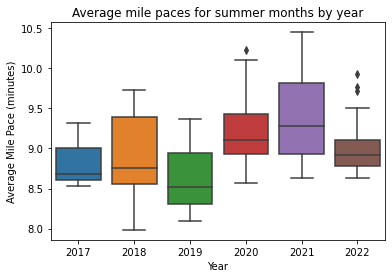

<Figure size 432x288 with 0 Axes>

In [37]:
# Side-by-side boxplot of ANOVA data
sns.boxplot(x = summer.year, y = summer.avg_pace_int)
plt.title('Average mile paces for summer months by year')
plt.xlabel('Year')
plt.ylabel('Average Mile Pace (minutes)')
plt.show()
plt.clf()

### Conclusion:
Based on these analyses, my average mile pace is not significantly different since March 20, 2022 than it was previously. Based on the side-by-side boxplot, the years where I was training for a race (2017-2019) had faster average paces in general than years when I was not (2020-2022).

## Goal 2: Predict average mile pace based on run features

Method: I will create and test various regression models to predict the average mile pace of my runs.

In [49]:
# Limit features to factors external to the run
# Target is average mile pace
feature_list = ['distance', 'temp', 'humidity', 'month', 'elev_diff']
X = activities_reg[feature_list]

y = activities_reg['avg_pace_int']

In [50]:
# Change data type of year and month features to int
convert_dict = {'month': int}

X = X.astype(convert_dict)

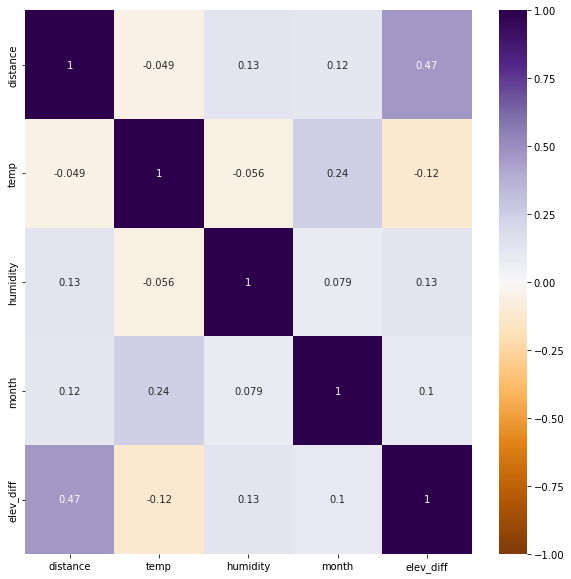

<Figure size 432x288 with 0 Axes>

In [51]:
# Check for multicollinearity
corr_grid = X.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, vmin=-1, center=0, vmax=1, cmap='PuOr', annot=True)
plt.show()
plt.clf()

In [52]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Linear Regression

In [53]:
# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict target
y_pred_lin = lr_model.predict(X_train)

# Evaluate model performance on training data
print('Linear Regression Model Training Performance')
print('Bias:', lr_model.intercept_)
print('Coefficients:', lr_model.coef_)
print('Score:', lr_model.score(X_train, y_train))
print('MAE:', mean_absolute_error(y_train, y_pred_lin))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_lin)))
print('MSE:', mean_squared_error(y_train, y_pred_lin))
print('R^2:', r2_score(y_train, y_pred_lin))
print()

# Evaluate model performance on test data
y_test_pred_lin = lr_model.predict(X_test)

print('Linear Regression Model Test Performance')
print('MAE:', mean_absolute_error(y_test, y_test_pred_lin))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred_lin)))
print('MSE:', mean_squared_error(y_test, y_test_pred_lin))
print('R^2:', r2_score(y_test, y_test_pred_lin))

Linear Regression Model Training Performance
Bias: 7.988771122446688
Coefficients: [-0.0480694   0.01471524  0.0002344  -0.02377411  0.00281502]
Score: 0.32525098005219644
MAE: 0.26742443271098043
RMSE: 0.34643724338124665
MSE: 0.12001876360159713
R^2: 0.32525098005219644

Linear Regression Model Test Performance
MAE: 0.2574069883465594
RMSE: 0.33124494848816977
MSE: 0.10972321589893023
R^2: 0.3951567774737771


### Linear Regression with Polynomial Features

In [54]:
# Create polynomial features object from unscaled data
poly_feat = PolynomialFeatures(degree = 2, include_bias = False)
pipe_scale = StandardScaler()
lr_pipe = LinearRegression()

stages = [('poly_feat', poly_feat),
          ('pipe_scale', pipe_scale),
          ('lr_pipe', lr_pipe)]

# Create and fit pipeline
pipe = Pipeline(stages)
pipe.fit(X_train.values, y_train.values)

# Predict target values
y_train_pred = pipe.predict(X_train.values)

# Evaluate performance on training data
print('Polynomial Model Train Performance')
print('Bias:', pipe.predict([[0, 0, 0, 0, 0]]))
print('Score:', pipe.score(X_train.values, y_train.values))
print('MAE:', mean_absolute_error(y_train.values, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print('MSE:', mean_squared_error(y_train.values, y_train_pred))
print('R^2:', r2_score(y_train.values, y_train_pred))
print()

# Evaluate performance on test data
y_test_pred2 = pipe.predict(X_test.values)

print('Polynomial Model Test Performance')
print('MAE:', mean_absolute_error(y_test.values, y_test_pred2))
print('RMSE:', np.sqrt(mean_squared_error(y_test.values, y_test_pred2)))
print('MSE:', mean_squared_error(y_test.values, y_test_pred2))
print('R^2:', r2_score(y_test.values, y_test_pred2))

Polynomial Model Train Performance
Bias: [8.49813099]
Score: 0.4593802325665818
MAE: 0.2390263260036302
RMSE: 0.31009831308354313
MSE: 0.09616096377725915
R^2: 0.4593802325665818

Polynomial Model Test Performance
MAE: 0.25049478093336497
RMSE: 0.3272573337477799
MSE: 0.1070973624917058
R^2: 0.4096316506689818


### Support Vector Regression Model

In [55]:
# Create SVR model
svr = SVR(kernel = 'rbf', C = 0.1)
svr_scale = StandardScaler()

# Create and fit pipeline
steps2 = [('svr_scale', svr_scale),
          ('svr', svr)]
pipe_svr = Pipeline(steps2)
pipe_svr.fit(X_train.values, y_train.values)

# Predict target values
y_pred_svr = pipe_svr.predict(X_train.values)

# Evaluate performance on training data
print('SVR Model Train Performance')
print('Bias:', pipe_svr.predict([[0, 0, 0, 0, 0]]))
print('Score:', pipe_svr.score(X_train.values, y_train.values))
print('MAE:', mean_absolute_error(y_train.values, y_pred_svr))
print('RMSE:', np.sqrt(mean_squared_error(y_train.values, y_pred_svr)))
print('MSE:', mean_squared_error(y_train.values, y_pred_svr))
print('R^2:', r2_score(y_train.values, y_pred_svr))
print()

# Evaluate performance on test data
y_test_svr = pipe_svr.predict(X_test.values)

print('SVR Model Test Performance')
print('MAE:', mean_absolute_error(y_test.values, y_test_svr))
print('RMSE:', np.sqrt(mean_squared_error(y_test.values, y_test_svr)))
print('MSE:', mean_squared_error(y_test.values, y_test_svr))
print('R^2:', r2_score(y_test.values, y_test_svr))

SVR Model Train Performance
Bias: [8.92441161]
Score: 0.39580438822408803
MAE: 0.2399087166378627
RMSE: 0.32782511812879295
MSE: 0.10746930807615704
R^2: 0.39580438822408803

SVR Model Test Performance
MAE: 0.24511062090450592
RMSE: 0.31986745441400594
MSE: 0.10231518839329616
R^2: 0.43599312365960097


### Decision Tree Regression

In [56]:
# Create and train model
tree_scale = StandardScaler()
tree = DecisionTreeRegressor(max_depth = 3, random_state = 42)

steps3 = [('tree_scale', tree_scale),
          ('tree', tree)]

pipe_tree = Pipeline(steps3)
pipe_tree.fit(X_train.values, y_train.values)

# Predict target values
y_pred_tree = pipe_tree.predict(X_train.values)

# Evaluate performance on training data
print('Decision Tree Model Train Performance')
print('Bias:', pipe_tree.predict([[0, 0, 0, 0, 0]]))
print('Score:', pipe_tree.score(X_train.values, y_train.values))
print('MAE:', mean_absolute_error(y_train.values, y_pred_tree))
print('RMSE:', np.sqrt(mean_squared_error(y_train.values, y_pred_tree)))
print('MSE:', mean_squared_error(y_train.values, y_pred_tree))
print('R^2:', r2_score(y_train.values, y_pred_tree))
print()

# Evaluate performance on test data
y_test_tree = pipe_tree.predict(X_test.values)

print('Decision Tree Model Test Performance')
print('MAE:', mean_absolute_error(y_test.values, y_test_tree))
print('RMSE:', np.sqrt(mean_squared_error(y_test.values, y_test_tree)))
print('MSE:', mean_squared_error(y_test.values, y_test_tree))
print('R^2:', r2_score(y_test.values, y_test_tree))

Decision Tree Model Train Performance
Bias: [8.97179487]
Score: 0.41486357199207446
MAE: 0.2520144715025373
RMSE: 0.3226131095024997
MSE: 0.10407921842287188
R^2: 0.41486357199207446

Decision Tree Model Test Performance
MAE: 0.318230243024648
RMSE: 0.3990568567480846
MSE: 0.15924637491766133
R^2: 0.12216307376972857


### Artificial Neural Net Model

In [57]:
# Build and train model
ann_scale = StandardScaler()
ann = MLPRegressor(hidden_layer_sizes = (50, 25, 10),
                   solver='sgd', 
                   max_iter = 400,
                  random_state = 42)

steps3 = [('ann_scale', ann_scale),
          ('ann', ann)]

pipe_ann = Pipeline(steps3)
pipe_ann.fit(X_train.values, y_train.values)

# Predict target values
y_pred_ann = pipe_ann.predict(X_train.values)

# Evaluate performance on training data
print('ANN Model Train Performance')
print('Bias:', pipe_ann.predict([[0, 0, 0, 0, 0]]))
print('Score:', pipe_ann.score(X_train.values, y_train.values))
print('MAE:', mean_absolute_error(y_train.values, y_pred_ann))
print('RMSE:', np.sqrt(mean_squared_error(y_train.values, y_pred_ann)))
print('MSE:', mean_squared_error(y_train.values, y_pred_ann))
print('R^2:', r2_score(y_train.values, y_pred_ann))
print()

# Evaluate performance on test data
y_test_ann = pipe_ann.predict(X_test.values)

print('Ann Model Test Performance')
print('MAE:', mean_absolute_error(y_test.values, y_test_ann))
print('RMSE:', np.sqrt(mean_squared_error(y_test.values, y_test_ann)))
print('MSE:', mean_squared_error(y_test.values, y_test_ann))
print('R^2:', r2_score(y_test.values, y_test_ann))

ANN Model Train Performance
Bias: [9.98694375]
Score: 0.4410546514509964
MAE: 0.244024096234873
RMSE: 0.3153102698463194
MSE: 0.09942056627055874
R^2: 0.4410546514509964

Ann Model Test Performance
MAE: 0.29773782054827386
RMSE: 0.3798475904849077
MSE: 0.14428419199719011
R^2: 0.2046412882433245


### Comparison of Results

| Model | Set | RMSE | R2 |
|:---|:---|:---|:---|
|Linear Regression|Training|0.35|32.53|
|Linear Regression|Test|0.33|39.52|
|Polynomial|Training|0.31|45.94|
|Polynomial|Test|0.33|40.96|
|SVR|Training|0.33|39.58|
|SVR|Test|0.32|43.60|
|Decision Tree|Training|0.32|41.49|
|Decision Tree|Test|0.40|12.22|
|Artificial Neural Network|Training|0.32|44.11|
|Artificial Neural Network|Test|0.38|20.46|

In [47]:
# Calculate fitted values and residuals
fitted_values = model_temp_elev.predict(activities_reg)
residuals = activities_reg.avg_pace_int - fitted_values

NameError: name 'model_temp_elev' is not defined

In [ ]:
# Check normality assumption
plt.hist(residuals)
plt.title('Distribution of Residuals from Model')
plt.show()
plt.clf()

The residuals are slightly right-skewed

In [ ]:
# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='black', linestyle='-')
plt.title('Model Residuals vs. Fitted Values')
plt.show()
plt.clf()

There is a relatively even distribution of residuals vs fitted values, indicating homoscedasticity.

# Conclusions

## Goal 1:

There is not enough evidence to reject the null hypothesis. The p-value of the two-sample t-test between data from before and after March 20, 2022 is 0.98, much higher than the significance threshold of 0.05, indicating that there is not a significant difference between the two data sets.

The one-way ANOVA showed that the data from at least one year was significantly different than the others, but that year was 2021, not 2022. This is further illustrated by the side-by-side boxplots of the data.

My average mile pace for regular 3-4 mile runs has remained roughly consistent over the past 6 years.

## Goal 2:

The best model I was able to make used the temperature, the square of the temperature, and the total elevation change to predict my average mile pace. Surprisingly, the distance of the run did not have a large impact on the average mile pace. This could be because I am more likely to run longer distances when I am training for a race, and therefore in better shape.

I am not very satisfied with this model, since the R-squared value is only 0.360, meaning that only 36.0% of the variation in pace can be explained by these predictors. I would like to revisit this data after I learn more about machine learning and make a new model.

## Other Observations

The distribution of my mile paces is normal, but slightly right-skewed (skewed towards slower times).

My total run distance by year (Jan-Sept) was pretty consistent for 2017-2019, then dropped to a lower, but still consistent level for 2020-2022. This makes sense, because I was using training schedules in 2017-2019, which leads me to run farther. This is also demonstrated in the heatmap of miles per month, where I ran more miles in the summers of those years than any other times in this dataset.

I typically run fastest in the temperature range of 45-65 degrees.

In [ ]:
from watermark import watermark
print(watermark())